# **Packages Import**

In [2]:
import pandas            as pd                                   # Library for Read/Write IO File (CSV, Excel, TXT, JSON, etc.)
import matplotlib.pyplot as plt                                  # Library for plotting and figures
from sklearn.linear_model   import LinearRegression              # Linear Regression importation from sickit-learn library of Machine Learning
from sklearn.neural_network import MLPRegressor                  # Neural Network importation from sickit-learn library of Machine Learning
from sklearn.svm            import SVR                           # Support Vector Regressor importation from sickit-learn library of Machine Learning
from sklearn.metrics        import mean_squared_error            # Mean Squared Error for forecasting performance evaluation
from sklearn.metrics        import mean_absolute_error           # Mean Absolute Error for forecasting performance evaluation
from sklearn.metrics        import mean_absolute_percentage_error# MAPE for evaluation the percentage of error
import numpy            as np 
from keras.models import Sequential
from keras.layers import Embedding, Bidirectional, LSTM, Dense


# **Business & Data Understanding**

The goal of this step is to:
* identify the number of samples;
* identify the type of forecasting;
* study the stationarity of your time series.


In [3]:
df=pd.read_csv("C:/work/Studies/Semester2/Data science/regression/Retail Sales Dataset - MiniProjet.csv")        # Read dataset using read_csv(filepath) function
df.head()                                               # Display the first five rows

,Date,Sales
0,2014-01-01,0
1,2014-01-02,70
2,2014-01-03,59
3,2014-01-04,93
4,2014-01-05,96


In [4]:

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 937 entries, 0 to 936
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Date    937 non-null    object
 1   Sales   937 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 14.8+ KB


In [5]:
if df.duplicated().any():
    print("DataFrame has duplicate values.")
else:
    print("DataFrame has unique values.")

DataFrame has unique values.


This dataset includes:
* 937 samples;
* Daily Sampled - Short Term;
* The dataset has records of 937 days of sales; 
* Each sample represnting one day;
* The dataset dosen't have duplicated values;

Text(0.5, 1.0, 'Distribution of the Number of sales over ~ 2.5 years')

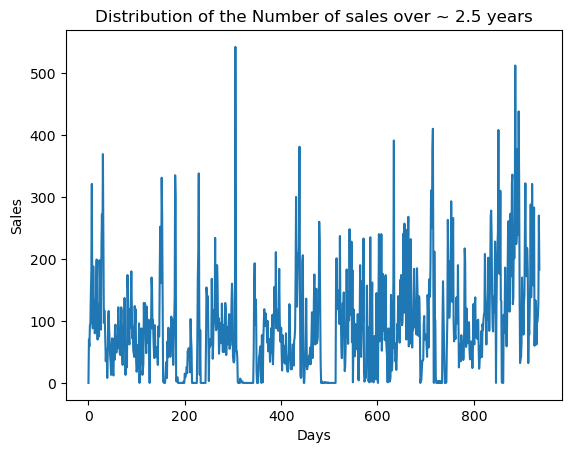

In [6]:
plt.xlabel("Days")
plt.ylabel("Sales")
plt.plot(df["Sales"])
plt.title("Distribution of the Number of sales over ~ 2.5 years")

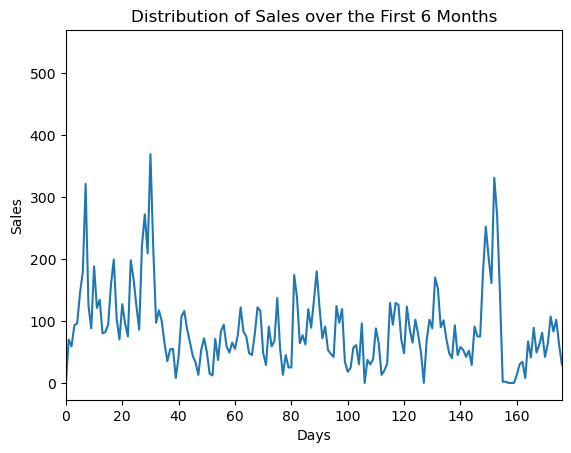

In [7]:
plt.xlabel("Days")
plt.ylabel("Sales")
plt.plot(df["Sales"])

# Limiting x-axis to show only the first 6 months
plt.xlim(0, 176)

plt.title("Distribution of Sales over the First 6 Months")
plt.show()

# **Data preparation & Machine learning & Evaluation**

The goal of this step is to:
* Construct the X and Y where X denotes the matrix features and y is the label vector;
* Split dataset into training set and testing set: X_train,X_test,y_train,y_test.

# **2. Machine learning models**

## **2.1. Data Loading**

In [8]:
def load_data(data,seq_len):
  X=[]
  y=[]
  for i in range(seq_len,len(data)):
    X.append(data.iloc[i-seq_len:i,1])
    y.append(data.iloc[i,1])
  return X,y
S = [15,25,35,45,55] # S has random sequence partition values 

## **2.2. For S = 15**

### **2.2.1. Data split**

We split the dataset into 80% for train and 20% for test

In [9]:
X,y = load_data(df,S[0])
print(len(X))
print(len(y))
train_size=int(len(X)*0.8)

922
922


In [10]:
X_train=X[:train_size]
y_train=y[:train_size]
X_test=X[train_size:]
y_test=y[train_size:]

In [11]:
print(len(y_train))
print(len(X_train))
print(len(X_test))
print(len(y_test))

737
737
185
185


### **2.2.2. Machine learning**

In [12]:
#Inialization of ML algorithms
lr=LinearRegression()
neural=MLPRegressor(hidden_layer_sizes=(10,10),activation='logistic',solver='adam')
linear_svm=SVR(kernel='linear')
rbf_svm=SVR(kernel='rbf')
sigmoid_svm=SVR(kernel='sigmoid')
poly_svm=SVR(kernel='poly',degree=2)
# Training
lr.fit(X_train,y_train)
neural.fit(X_train,y_train)
linear_svm.fit(X_train,y_train)
rbf_svm.fit(X_train,y_train)
sigmoid_svm.fit(X_train,y_train)
poly_svm.fit(X_train,y_train)
# Testing
y_pred_lr=lr.predict(X_test)
y_pred_neural=neural.predict(X_test)
y_pred_linear_svm=linear_svm.predict(X_test)
y_pred_rbf_svm=rbf_svm.predict(X_test)
y_pred_sigmoid_svm=sigmoid_svm.predict(X_test)
y_pred_poly_svm=poly_svm.predict(X_test)

c:\Users\Hedi Aloulou\anaconda3\envs\deep\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


### **2.2.3. Evaluation**

In [13]:
print(" **** Performance of Linear Regression *****")
mse=mean_squared_error(y_test,y_pred_lr)
mae=mean_absolute_error(y_test,y_pred_lr)
mape=mean_absolute_percentage_error(y_test,y_pred_lr)
print("MSE= ",mse)
print("MAE= ",mae)
print("MAPEE= ",mape)
print(" **** Performance of Neural Network Regression *****")
mse=mean_squared_error(y_test,y_pred_neural)
mae=mean_absolute_error(y_test,y_pred_neural)
mape=mean_absolute_percentage_error(y_test,y_pred_neural)
print("MSE= ",mse)
print("MAE= ",mae)
print("MAPEE= ",mape)
print(" **** Performance of SVR Linear Regression *****")
mse=mean_squared_error(y_test,y_pred_linear_svm)
mae=mean_absolute_error(y_test,y_pred_linear_svm)
mape=mean_absolute_percentage_error(y_test,y_pred_linear_svm)
print("MSE= ",mse)
print("MAE= ",mae)
print("MAPEE= ",mape)
print(" **** Performance of SVR RBF Regression *****")
mse=mean_squared_error(y_test,y_pred_rbf_svm)
mae=mean_absolute_error(y_test,y_pred_rbf_svm)
mape=mean_absolute_percentage_error(y_test,y_pred_rbf_svm)
print("MSE= ",mse)
print("MAE= ",mae)
print("MAPEE= ",mape)
print(" **** Performance of SVR Sigmoid Regression *****")
mse=mean_squared_error(y_test,y_pred_sigmoid_svm)
mae=mean_absolute_error(y_test,y_pred_sigmoid_svm)
mape=mean_absolute_percentage_error(y_test,y_pred_sigmoid_svm)
print("MSE= ",mse)
print("MAE= ",mae)
print("MAPEE= ",mape)
print(" **** Performance of SVR Polynomial Regression *****")
mse=mean_squared_error(y_test,y_pred_poly_svm)
mae=mean_absolute_error(y_test,y_pred_poly_svm)
mape=mean_absolute_percentage_error(y_test,y_pred_poly_svm)
print("MSE= ",mse)
print("MAE= ",mae)
print("MAPEE= ",mape)

 **** Performance of Linear Regression *****
MSE=  4554.914384182211
MAE=  47.59822825305601
MAPEE=  4674715871090629.0
 **** Performance of Neural Network Regression *****
MSE=  25620.40833708526
MAE=  132.5773475557063
MAPEE=  628871218598052.8
 **** Performance of SVR Linear Regression *****
MSE=  4946.021096067414
MAE=  49.680991935658575
MAPEE=  4664879984670845.0
 **** Performance of SVR RBF Regression *****
MSE=  13280.954064163616
MAE=  82.1770496445911
MAPEE=  5692788858641335.0
 **** Performance of SVR Sigmoid Regression *****
MSE=  13686.057677143084
MAE=  83.93605116253678
MAPEE=  5546167434161092.0
 **** Performance of SVR Polynomial Regression *****
MSE=  5860.1832179748235
MAE=  56.10001665580541
MAPEE=  3981346539829772.5


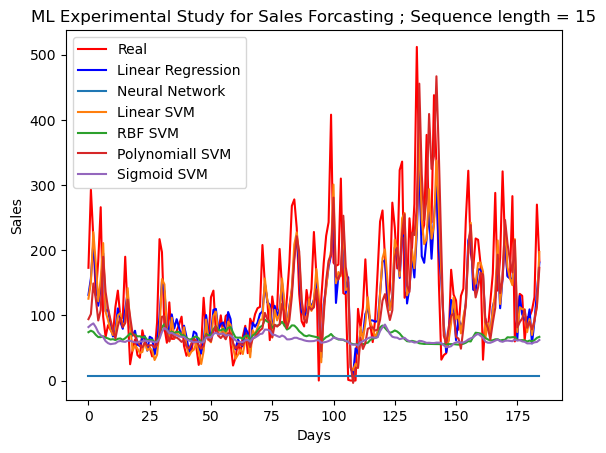

In [14]:
plt.xlabel("Days")
plt.ylabel("Sales")
plt.plot(y_test,color='red',label='Real')
plt.plot(y_pred_lr,color='blue',label='Linear Regression')
plt.plot(y_pred_neural,label='Neural Network')
plt.plot(y_pred_linear_svm,label='Linear SVM')
plt.plot(y_pred_rbf_svm,label='RBF SVM')
plt.plot(y_pred_poly_svm,label='Polynomiall SVM')
plt.plot(y_pred_sigmoid_svm,label='Sigmoid SVM')
plt.title("ML Experimental Study for Sales Forcasting ; Sequence length = 15")
plt.legend()

The Neural Network Regression model has the highest MSE, MAE, and MAPE values, indicating poorer performance compared to other models.

The SVR with Linear Kernel and SVR with Polynomial Kernel have relatively lower MSE, MAE, and MAPE values compared to other SVR models, suggesting better performance among the SVR models.
However, the choice of the best model also depends on other factors such as computational complexity, interpretability, and specific requirements of your problem domain.

## **2.3. For S = 25**

### **2.3.1. Data split**

In [15]:
X,y = load_data(df,S[1])
print(len(X))
print(len(y))
train_size=int(len(X)*0.8)

912
912


In [16]:
print(len(X_train))
print(len(X_test))

737
185


In [17]:
X_train=X[:train_size]
y_train=y[:train_size]
X_test=X[train_size:]
y_test=y[train_size:]

### **2.3.2. Machine learning**

In [18]:
#Inialization of ML algorithms
lr=LinearRegression()
neural=MLPRegressor(hidden_layer_sizes=(10,10),activation='logistic',solver='adam')
linear_svm=SVR(kernel='linear')
rbf_svm=SVR(kernel='rbf')
sigmoid_svm=SVR(kernel='sigmoid')
poly_svm=SVR(kernel='poly',degree=2)
# Training
lr.fit(X_train,y_train)
neural.fit(X_train,y_train)
linear_svm.fit(X_train,y_train)
rbf_svm.fit(X_train,y_train)
sigmoid_svm.fit(X_train,y_train)
poly_svm.fit(X_train,y_train)
# Testing
y_pred_lr=lr.predict(X_test)
y_pred_neural=neural.predict(X_test)
y_pred_linear_svm=linear_svm.predict(X_test)
y_pred_rbf_svm=rbf_svm.predict(X_test)
y_pred_sigmoid_svm=sigmoid_svm.predict(X_test)
y_pred_poly_svm=poly_svm.predict(X_test)

c:\Users\Hedi Aloulou\anaconda3\envs\deep\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


### **2.3.3. Evaluation**

In [19]:
print(" **** Performance of Linear Regression *****")
mse=mean_squared_error(y_test,y_pred_lr)
mae=mean_absolute_error(y_test,y_pred_lr)
mape=mean_absolute_percentage_error(y_test,y_pred_lr)
print("MSE= ",mse)
print("MAE= ",mae)
print("MAPEE= ",mape)
print(" **** Performance of Neural Network Regression *****")
mse=mean_squared_error(y_test,y_pred_neural)
mae=mean_absolute_error(y_test,y_pred_neural)
mape=mean_absolute_percentage_error(y_test,y_pred_neural)
print("MSE= ",mse)
print("MAE= ",mae)
print("MAPEE= ",mape)
print(" **** Performance of SVR Linear Regression *****")
mse=mean_squared_error(y_test,y_pred_linear_svm)
mae=mean_absolute_error(y_test,y_pred_linear_svm)
mape=mean_absolute_percentage_error(y_test,y_pred_linear_svm)
print("MSE= ",mse)
print("MAE= ",mae)
print("MAPEE= ",mape)
print(" **** Performance of SVR RBF Regression *****")
mse=mean_squared_error(y_test,y_pred_rbf_svm)
mae=mean_absolute_error(y_test,y_pred_rbf_svm)
mape=mean_absolute_percentage_error(y_test,y_pred_rbf_svm)
print("MSE= ",mse)
print("MAE= ",mae)
print("MAPEE= ",mape)
print(" **** Performance of SVR Sigmoid Regression *****")
mse=mean_squared_error(y_test,y_pred_sigmoid_svm)
mae=mean_absolute_error(y_test,y_pred_sigmoid_svm)
mape=mean_absolute_percentage_error(y_test,y_pred_sigmoid_svm)
print("MSE= ",mse)
print("MAE= ",mae)
print("MAPEE= ",mape)
print(" **** Performance of SVR Polynomial Regression *****")
mse=mean_squared_error(y_test,y_pred_poly_svm)
mae=mean_absolute_error(y_test,y_pred_poly_svm)
mape=mean_absolute_percentage_error(y_test,y_pred_poly_svm)
print("MSE= ",mse)
print("MAE= ",mae)
print("MAPEE= ",mape)

 **** Performance of Linear Regression *****
MSE=  4482.207622983147
MAE=  47.3282016331514
MAPEE=  4089072789735537.5
 **** Performance of Neural Network Regression *****
MSE=  24812.60064042576
MAE=  129.78129222996824
MAPEE=  819962185787007.1
 **** Performance of SVR Linear Regression *****
MSE=  4818.940901685799
MAE=  48.982686697521416
MAPEE=  4146641871549143.5
 **** Performance of SVR RBF Regression *****
MSE=  13587.81796972349
MAE=  83.1130192690558
MAPEE=  5708789974115316.0
 **** Performance of SVR Sigmoid Regression *****
MSE=  13498.72556050315
MAE=  83.16061750121668
MAPEE=  5407923197352072.0
 **** Performance of SVR Polynomial Regression *****
MSE=  5861.545934729596
MAE=  55.16165810521833
MAPEE=  3657303140932522.5


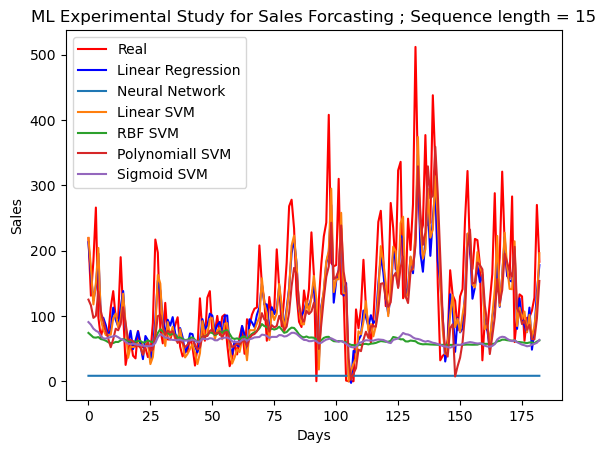

In [20]:
plt.xlabel("Days")
plt.ylabel("Sales")
plt.plot(y_test,color='red',label='Real')
plt.plot(y_pred_lr,color='blue',label='Linear Regression')
plt.plot(y_pred_neural,label='Neural Network')
plt.plot(y_pred_linear_svm,label='Linear SVM')
plt.plot(y_pred_rbf_svm,label='RBF SVM')
plt.plot(y_pred_poly_svm,label='Polynomiall SVM')
plt.plot(y_pred_sigmoid_svm,label='Sigmoid SVM')
plt.title("ML Experimental Study for Sales Forcasting ; Sequence length = 15")
plt.legend()

Based on the metrics, Linear Regression has the lowest MSE and MAE values among all models, suggesting that it performs relatively better in terms of prediction accuracy. However, considering MAPE, SVR Polynomial Regression has the lowest value.

Therefore, if you prioritize MSE and MAE, Linear Regression is the best choice. If you prioritize MAPE, SVR Polynomial Regression is the best choice. However, it's essential to consider other factors like computational complexity, interpretability, and specific requirements of your problem domain when selecting the best model

## **2.4. For S = 35**

### **2.4.1. Data split**

In [21]:
X,y = load_data(df,S[2])
print(len(X))
print(len(y))
train_size=int(len(X)*0.8)

902
902


In [22]:
X_train=X[:train_size]
y_train=y[:train_size]
X_test=X[train_size:]
y_test=y[train_size:]

### **2.4.2. Machine learning**

In [23]:
#Inialization of ML algorithms
lr=LinearRegression()
neural=MLPRegressor(hidden_layer_sizes=(10,10),activation='logistic',solver='adam')
linear_svm=SVR(kernel='linear')
rbf_svm=SVR(kernel='rbf')
sigmoid_svm=SVR(kernel='sigmoid')
poly_svm=SVR(kernel='poly',degree=2)
# Training
lr.fit(X_train,y_train)
neural.fit(X_train,y_train)
linear_svm.fit(X_train,y_train)
rbf_svm.fit(X_train,y_train)
sigmoid_svm.fit(X_train,y_train)
poly_svm.fit(X_train,y_train)
# Testing
y_pred_lr=lr.predict(X_test)
y_pred_neural=neural.predict(X_test)
y_pred_linear_svm=linear_svm.predict(X_test)
y_pred_rbf_svm=rbf_svm.predict(X_test)
y_pred_sigmoid_svm=sigmoid_svm.predict(X_test)
y_pred_poly_svm=poly_svm.predict(X_test)

c:\Users\Hedi Aloulou\anaconda3\envs\deep\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


### **2.4.3. Evaluation**

In [24]:
print(" **** Performance of Linear Regression *****")
mse=mean_squared_error(y_test,y_pred_lr)
mae=mean_absolute_error(y_test,y_pred_lr)
mape=mean_absolute_percentage_error(y_test,y_pred_lr)
print("MSE= ",mse)
print("MAE= ",mae)
print("MAPEE= ",mape)
print(" **** Performance of Neural Network Regression *****")
mse=mean_squared_error(y_test,y_pred_neural)
mae=mean_absolute_error(y_test,y_pred_neural)
mape=mean_absolute_percentage_error(y_test,y_pred_neural)
print("MSE= ",mse)
print("MAE= ",mae)
print("MAPEE= ",mape)
print(" **** Performance of SVR Linear Regression *****")
mse=mean_squared_error(y_test,y_pred_linear_svm)
mae=mean_absolute_error(y_test,y_pred_linear_svm)
mape=mean_absolute_percentage_error(y_test,y_pred_linear_svm)
print("MSE= ",mse)
print("MAE= ",mae)
print("MAPEE= ",mape)
print(" **** Performance of SVR RBF Regression *****")
mse=mean_squared_error(y_test,y_pred_rbf_svm)
mae=mean_absolute_error(y_test,y_pred_rbf_svm)
mape=mean_absolute_percentage_error(y_test,y_pred_rbf_svm)
print("MSE= ",mse)
print("MAE= ",mae)
print("MAPEE= ",mape)
print(" **** Performance of SVR Sigmoid Regression *****")
mse=mean_squared_error(y_test,y_pred_sigmoid_svm)
mae=mean_absolute_error(y_test,y_pred_sigmoid_svm)
mape=mean_absolute_percentage_error(y_test,y_pred_sigmoid_svm)
print("MSE= ",mse)
print("MAE= ",mae)
print("MAPEE= ",mape)
print(" **** Performance of SVR Polynomial Regression *****")
mse=mean_squared_error(y_test,y_pred_poly_svm)
mae=mean_absolute_error(y_test,y_pred_poly_svm)
mape=mean_absolute_percentage_error(y_test,y_pred_poly_svm)
print("MSE= ",mse)
print("MAE= ",mae)
print("MAPEE= ",mape)

 **** Performance of Linear Regression *****
MSE=  4183.734245480883
MAE=  46.510638361228004
MAPEE=  4486530397559359.5
 **** Performance of Neural Network Regression *****
MSE=  24429.743833983153
MAE=  128.16355731455337
MAPEE=  956535460657383.1
 **** Performance of SVR Linear Regression *****
MSE=  4780.417874513263
MAE=  48.65061920844942
MAPEE=  4020023444624959.0
 **** Performance of SVR RBF Regression *****
MSE=  13693.289384411673
MAE=  83.15690275688752
MAPEE=  5908079269415679.0
 **** Performance of SVR Sigmoid Regression *****
MSE=  14156.13501571373
MAE=  85.08687817219406
MAPEE=  5406337661110226.0
 **** Performance of SVR Polynomial Regression *****
MSE=  5935.6341222831525
MAE=  55.56566115696754
MAPEE=  4938954139496337.0


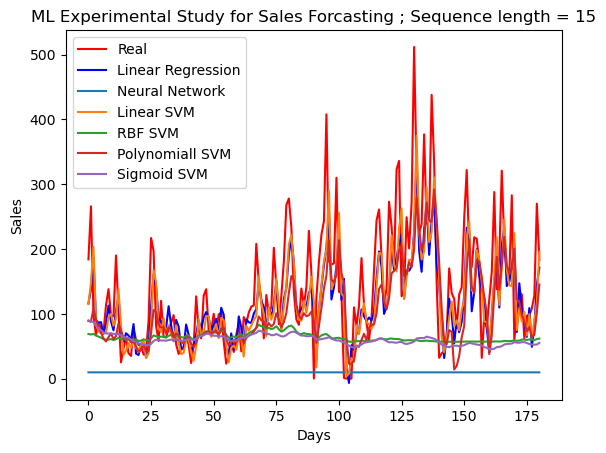

In [25]:
plt.xlabel("Days")
plt.ylabel("Sales")
plt.plot(y_test,color='red',label='Real')
plt.plot(y_pred_lr,color='blue',label='Linear Regression')
plt.plot(y_pred_neural,label='Neural Network')
plt.plot(y_pred_linear_svm,label='Linear SVM')
plt.plot(y_pred_rbf_svm,label='RBF SVM')
plt.plot(y_pred_poly_svm,label='Polynomiall SVM')
plt.plot(y_pred_sigmoid_svm,label='Sigmoid SVM')
plt.title("ML Experimental Study for Sales Forcasting ; Sequence length = 15")
plt.legend()

Linear Regression has the lowest MSE and MAE values among all models.
SVR Linear Regression also has relatively low MSE and MAE values.
Neural Network Regression has the lowest MAPE value.

## **2.5. For S = 45**

### **2.5.1. Data split**

In [26]:
X,y = load_data(df,S[3])
print(len(X))
print(len(y))
train_size=int(len(X)*0.8)

892
892


In [27]:
X_train=X[:train_size]
y_train=y[:train_size]
X_test=X[train_size:]
y_test=y[train_size:]

### **2.5.2. Machine learning**

In [28]:
#Inialization of ML algorithms
lr=LinearRegression()
neural=MLPRegressor(hidden_layer_sizes=(10,10),activation='logistic',solver='adam')
linear_svm=SVR(kernel='linear')
rbf_svm=SVR(kernel='rbf')
sigmoid_svm=SVR(kernel='sigmoid')
poly_svm=SVR(kernel='poly',degree=2)
# Training
lr.fit(X_train,y_train)
neural.fit(X_train,y_train)
linear_svm.fit(X_train,y_train)
rbf_svm.fit(X_train,y_train)
sigmoid_svm.fit(X_train,y_train)
poly_svm.fit(X_train,y_train)
# Testing
y_pred_lr=lr.predict(X_test)
y_pred_neural=neural.predict(X_test)
y_pred_linear_svm=linear_svm.predict(X_test)
y_pred_rbf_svm=rbf_svm.predict(X_test)
y_pred_sigmoid_svm=sigmoid_svm.predict(X_test)
y_pred_poly_svm=poly_svm.predict(X_test)

c:\Users\Hedi Aloulou\anaconda3\envs\deep\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


### **2.5.3. Evaluation**

In [29]:
print(" **** Performance of Linear Regression *****")
mse=mean_squared_error(y_test,y_pred_lr)
mae=mean_absolute_error(y_test,y_pred_lr)
mape=mean_absolute_percentage_error(y_test,y_pred_lr)
print("MSE= ",mse)
print("MAE= ",mae)
print("MAPEE= ",mape)
print(" **** Performance of Neural Network Regression *****")
mse=mean_squared_error(y_test,y_pred_neural)
mae=mean_absolute_error(y_test,y_pred_neural)
mape=mean_absolute_percentage_error(y_test,y_pred_neural)
print("MSE= ",mse)
print("MAE= ",mae)
print("MAPEE= ",mape)
print(" **** Performance of SVR Linear Regression *****")
mse=mean_squared_error(y_test,y_pred_linear_svm)
mae=mean_absolute_error(y_test,y_pred_linear_svm)
mape=mean_absolute_percentage_error(y_test,y_pred_linear_svm)
print("MSE= ",mse)
print("MAE= ",mae)
print("MAPEE= ",mape)
print(" **** Performance of SVR RBF Regression *****")
mse=mean_squared_error(y_test,y_pred_rbf_svm)
mae=mean_absolute_error(y_test,y_pred_rbf_svm)
mape=mean_absolute_percentage_error(y_test,y_pred_rbf_svm)
print("MSE= ",mse)
print("MAE= ",mae)
print("MAPEE= ",mape)
print(" **** Performance of SVR Sigmoid Regression *****")
mse=mean_squared_error(y_test,y_pred_sigmoid_svm)
mae=mean_absolute_error(y_test,y_pred_sigmoid_svm)
mape=mean_absolute_percentage_error(y_test,y_pred_sigmoid_svm)
print("MSE= ",mse)
print("MAE= ",mae)
print("MAPEE= ",mape)
print(" **** Performance of SVR Polynomial Regression *****")
mse=mean_squared_error(y_test,y_pred_poly_svm)
mae=mean_absolute_error(y_test,y_pred_poly_svm)
mape=mean_absolute_percentage_error(y_test,y_pred_poly_svm)
print("MSE= ",mse)
print("MAE= ",mae)
print("MAPEE= ",mape)

 **** Performance of Linear Regression *****
MSE=  3924.3670016406063
MAE=  45.03231221804363
MAPEE=  4176315822744032.5
 **** Performance of Neural Network Regression *****
MSE=  24680.908646776254
MAE=  129.09424636804835
MAPEE=  764100801962974.2
 **** Performance of SVR Linear Regression *****
MSE=  4738.923984126469
MAE=  48.483791411365154
MAPEE=  3843672447510059.0
 **** Performance of SVR RBF Regression *****
MSE=  13299.895463754056
MAE=  81.70780465669702
MAPEE=  6259089005460496.0
 **** Performance of SVR Sigmoid Regression *****
MSE=  14091.89530514699
MAE=  84.51967209969222
MAPEE=  5682632027110522.0
 **** Performance of SVR Polynomial Regression *****
MSE=  5964.653723596035
MAE=  55.90785285489804
MAPEE=  5589053394522720.0


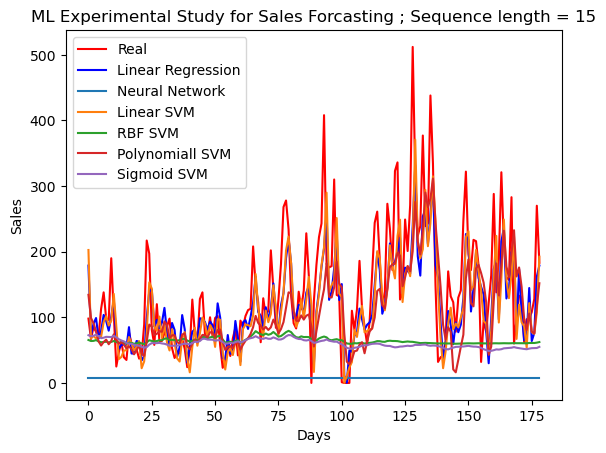

In [30]:
plt.xlabel("Days")
plt.ylabel("Sales")
plt.plot(y_test,color='red',label='Real')
plt.plot(y_pred_lr,color='blue',label='Linear Regression')
plt.plot(y_pred_neural,label='Neural Network')
plt.plot(y_pred_linear_svm,label='Linear SVM')
plt.plot(y_pred_rbf_svm,label='RBF SVM')
plt.plot(y_pred_poly_svm,label='Polynomiall SVM')
plt.plot(y_pred_sigmoid_svm,label='Sigmoid SVM')
plt.title("ML Experimental Study for Sales Forcasting ; Sequence length = 15")
plt.legend()

In this case, the model with the lowest MSE and MAE values is the Linear Regression model. However, if MAPEE is crucial, the SVR Linear Regression model has the lowest MAPEE value.

So, if you prioritize MSE and MAE, the Linear Regression model is the best choice. If MAPEE is more important, then the SVR Linear Regression model would be preferred.

## **2.6. For S = 55**

### **2.6.1. Data split**

In [31]:
X,y = load_data(df,S[-1])
print(len(X))
print(len(y))
train_size=int(len(X)*0.8)

882
882


In [32]:
X_train=X[:train_size]
y_train=y[:train_size]
X_test=X[train_size:]
y_test=y[train_size:]

### **2.6.2. Machine learning**

In [33]:
#Inialization of ML algorithms
lr=LinearRegression()
neural=MLPRegressor(hidden_layer_sizes=(10,10),activation='logistic',solver='adam')
linear_svm=SVR(kernel='linear')
rbf_svm=SVR(kernel='rbf')
sigmoid_svm=SVR(kernel='sigmoid')
poly_svm=SVR(kernel='poly',degree=2)
# Training
lr.fit(X_train,y_train)
neural.fit(X_train,y_train)
linear_svm.fit(X_train,y_train)
rbf_svm.fit(X_train,y_train)
sigmoid_svm.fit(X_train,y_train)
poly_svm.fit(X_train,y_train)
# Testing
y_pred_lr=lr.predict(X_test)
y_pred_neural=neural.predict(X_test)
y_pred_linear_svm=linear_svm.predict(X_test)
y_pred_rbf_svm=rbf_svm.predict(X_test)
y_pred_sigmoid_svm=sigmoid_svm.predict(X_test)
y_pred_poly_svm=poly_svm.predict(X_test)

c:\Users\Hedi Aloulou\anaconda3\envs\deep\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


### **2.6.3. Evaluation**

In [34]:
print(" **** Performance of Linear Regression *****")
mse=mean_squared_error(y_test,y_pred_lr)
mae=mean_absolute_error(y_test,y_pred_lr)
mape=mean_absolute_percentage_error(y_test,y_pred_lr)
print("MSE= ",mse)
print("MAE= ",mae)
print("MAPEE= ",mape)
print(" **** Performance of Neural Network Regression *****")
mse=mean_squared_error(y_test,y_pred_neural)
mae=mean_absolute_error(y_test,y_pred_neural)
mape=mean_absolute_percentage_error(y_test,y_pred_neural)
print("MSE= ",mse)
print("MAE= ",mae)
print("MAPEE= ",mape)
print(" **** Performance of SVR Linear Regression *****")
mse=mean_squared_error(y_test,y_pred_linear_svm)
mae=mean_absolute_error(y_test,y_pred_linear_svm)
mape=mean_absolute_percentage_error(y_test,y_pred_linear_svm)
print("MSE= ",mse)
print("MAE= ",mae)
print("MAPEE= ",mape)
print(" **** Performance of SVR RBF Regression *****")
mse=mean_squared_error(y_test,y_pred_rbf_svm)
mae=mean_absolute_error(y_test,y_pred_rbf_svm)
mape=mean_absolute_percentage_error(y_test,y_pred_rbf_svm)
print("MSE= ",mse)
print("MAE= ",mae)
print("MAPEE= ",mape)
print(" **** Performance of SVR Sigmoid Regression *****")
mse=mean_squared_error(y_test,y_pred_sigmoid_svm)
mae=mean_absolute_error(y_test,y_pred_sigmoid_svm)
mape=mean_absolute_percentage_error(y_test,y_pred_sigmoid_svm)
print("MSE= ",mse)
print("MAE= ",mae)
print("MAPEE= ",mape)
print(" **** Performance of SVR Polynomial Regression *****")
mse=mean_squared_error(y_test,y_pred_poly_svm)
mae=mean_absolute_error(y_test,y_pred_poly_svm)
mape=mean_absolute_percentage_error(y_test,y_pred_poly_svm)
print("MSE= ",mse)
print("MAE= ",mae)
print("MAPEE= ",mape)

 **** Performance of Linear Regression *****
MSE=  3956.681898824042
MAE=  45.253562433020925
MAPEE=  3912270866564498.0
 **** Performance of Neural Network Regression *****
MSE=  24485.339106515712
MAE=  128.20738332389328
MAPEE=  934448183837715.4
 **** Performance of SVR Linear Regression *****
MSE=  4639.014584569977
MAE=  47.7883929766743
MAPEE=  4060952483829676.0
 **** Performance of SVR RBF Regression *****
MSE=  13356.53645926207
MAE=  82.36307802303851
MAPEE=  6415871644091645.0
 **** Performance of SVR Sigmoid Regression *****
MSE=  14049.261308856572
MAE=  85.0705495336958
MAPEE=  6119921872478246.0
 **** Performance of SVR Polynomial Regression *****
MSE=  6549.0495815753275
MAE=  59.13988953140987
MAPEE=  6051326392604120.0


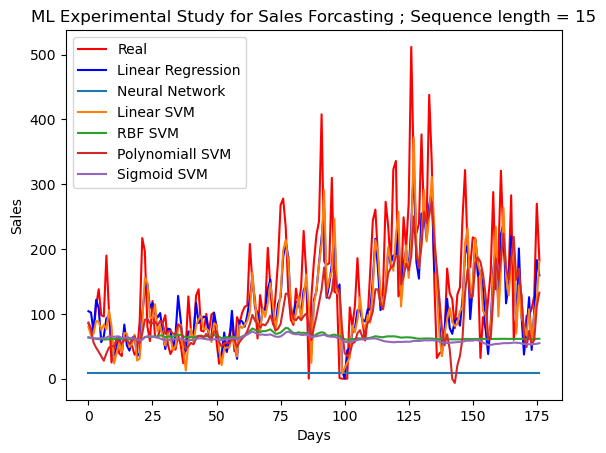

In [35]:
plt.xlabel("Days")
plt.ylabel("Sales")
plt.plot(y_test,color='red',label='Real')
plt.plot(y_pred_lr,color='blue',label='Linear Regression')
plt.plot(y_pred_neural,label='Neural Network')
plt.plot(y_pred_linear_svm,label='Linear SVM')
plt.plot(y_pred_rbf_svm,label='RBF SVM')
plt.plot(y_pred_poly_svm,label='Polynomiall SVM')
plt.plot(y_pred_sigmoid_svm,label='Sigmoid SVM')
plt.title("ML Experimental Study for Sales Forcasting ; Sequence length = 15")
plt.legend()

In this case, the Linear Regression model has the lowest MSE and MAE values, indicating better performance in terms of prediction accuracy

# **3. LSTM**

## **3.1. Data loading**

* We will use 25 as value for data partitioning 

In [69]:
sl=55
Xl,yl = load_data(df,sl)
train_size = int(len(Xl) * 0.8)
X_trainl = X[:train_size]
y_trainl = y[:train_size]
X_testl = X[train_size:]
y_testl = y[train_size:]

In [70]:
X_trainl = np.array(X_trainl)
y_trainl = np.array(y_trainl)
y_testl = np.array(y_testl)
X_testl = np.array(X_testl)

In [71]:
print(len(X_testl))
print(len(X_trainl))

177
705


In [72]:
X_train_reshaped = X_trainl.reshape(X_trainl.shape[0], 55, 1)
X_test_reshaped = X_testl.reshape(X_testl.shape[0], 55, 1)

In [73]:
model = Sequential()
model.add(LSTM(20, input_shape=(55, 1)))
model.add(Dense(100))
model.add(Dense(1))

In [76]:
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(X_train_reshaped, y_trainl, epochs=100, batch_size=2, verbose=1)

Epoch 1/100
353/353 [==============================] - 9s 20ms/step - loss: 3295.4529
Epoch 2/100
353/353 [==============================] - 6s 18ms/step - loss: 3262.8613
Epoch 3/100
353/353 [==============================] - 3s 10ms/step - loss: 3282.6128
Epoch 4/100
353/353 [==============================] - 6s 16ms/step - loss: 3274.2783
Epoch 5/100
353/353 [==============================] - 6s 18ms/step - loss: 3285.9517
Epoch 6/100
353/353 [==============================] - 6s 17ms/step - loss: 3267.4089
Epoch 7/100
353/353 [==============================] - 6s 18ms/step - loss: 3251.0251
Epoch 8/100
353/353 [==============================] - 7s 19ms/step - loss: 3269.6252
Epoch 9/100
353/353 [==============================] - 3s 10ms/step - loss: 3247.1787
Epoch 10/100
353/353 [==============================] - 6s 17ms/step - loss: 3296.2329
Epoch 11/100
353/353 [==============================] - 4s 11ms/step - loss: 3217.7830
Epoch 12/100
353/353 [==============================

In [78]:
print(" **** Performance of LSTM *****")
y_pred_lstm=model.predict(X_testl)
mse=mean_squared_error(y_test,y_pred_lstm)
mae=mean_absolute_error(y_test,y_pred_lstm)
mape=mean_absolute_percentage_error(y_test,y_pred_lstm)
print("MSE= ",mse)
print("MAE= ",mae)
print("MAPEE= ",mape)

 **** Performance of LSTM *****
6/6 [==============================] - 1s 34ms/step
MSE=  6164.602532466225
MAE=  53.875330896700845
MAPEE=  4528751198509392.0


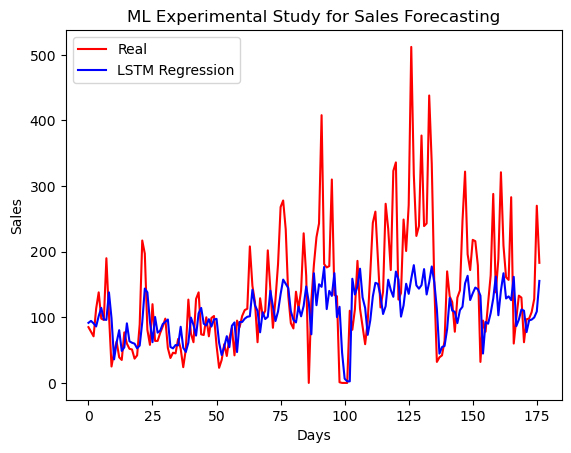

In [79]:
plt.xlabel("Days")
plt.ylabel("Sales")
plt.plot(y_test,color='red',label='Real')
plt.plot(y_pred_lstm,color='blue',label='LSTM Regression')
plt.title("ML Experimental Study for Sales Forecasting")
plt.legend()